## Dolphin social network

In [240]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain
import plotly.graph_objs as go
from collections import defaultdict

In [241]:
G = nx.read_gml('dolphins/dolphins.gml')

### Grafo dei delfini di Doubtful Sound

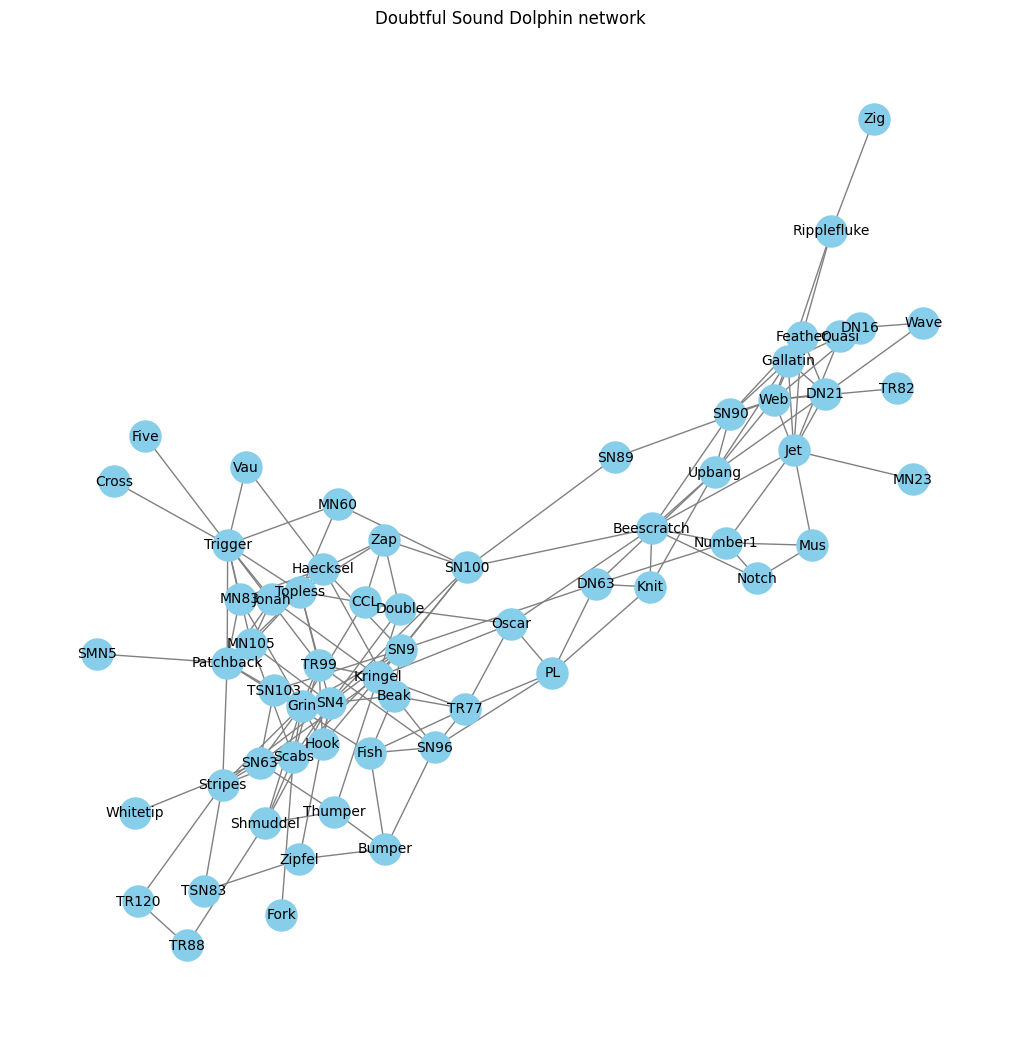

In [242]:
plt.figure(figsize=(10,10))
nx.draw(G, with_labels=True, node_size=500, node_color="skyblue", edge_color="gray", font_size=10, font_color="black")
plt.title("Doubtful Sound Dolphin network")
plt.show()


# Analysis

### Descriptive Analysis

In [243]:
G.nodes

NodeView(('Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'Scabs', 'Shmuddel', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel'))

In [244]:
G.edges

EdgeView([('Beak', 'Fish'), ('Beak', 'Grin'), ('Beak', 'Haecksel'), ('Beak', 'SN9'), ('Beak', 'SN96'), ('Beak', 'TR77'), ('Beescratch', 'Jet'), ('Beescratch', 'Knit'), ('Beescratch', 'Notch'), ('Beescratch', 'Number1'), ('Beescratch', 'Oscar'), ('Beescratch', 'SN100'), ('Beescratch', 'SN90'), ('Beescratch', 'Upbang'), ('Bumper', 'Fish'), ('Bumper', 'SN96'), ('Bumper', 'Thumper'), ('Bumper', 'Zipfel'), ('CCL', 'Double'), ('CCL', 'Grin'), ('CCL', 'Zap'), ('Cross', 'Trigger'), ('DN16', 'Feather'), ('DN16', 'Gallatin'), ('DN16', 'Wave'), ('DN16', 'Web'), ('DN21', 'Feather'), ('DN21', 'Gallatin'), ('DN21', 'Jet'), ('DN21', 'Upbang'), ('DN21', 'Wave'), ('DN21', 'Web'), ('DN63', 'Knit'), ('DN63', 'Number1'), ('DN63', 'PL'), ('DN63', 'SN9'), ('DN63', 'Upbang'), ('Double', 'Kringel'), ('Double', 'Oscar'), ('Double', 'SN4'), ('Double', 'Topless'), ('Double', 'Zap'), ('Feather', 'Gallatin'), ('Feather', 'Jet'), ('Feather', 'Ripplefluke'), ('Feather', 'SN90'), ('Feather', 'Web'), ('Fish', 'Patchba

In [245]:
is_direct_result = G.is_directed()  
print("Il grafo è diretto:", is_direct_result) # per scoprire se il grafo è diretto o indiretto

is_bipartite_result = nx.is_bipartite(G)
print("Il grafo è bipartito:", is_bipartite_result) # se il grafo è bipartito oppure no

is_unweighted_result = all('weight' not in data for u, v, data in G.edges(data=True))
print("Il grafo è non ponderato:", is_unweighted_result) # se il grafo è ponderato o no

Il grafo è diretto: False
Il grafo è bipartito: False
Il grafo è non ponderato: True


In [246]:
print("Numero di nodi: ", G.number_of_nodes())
print("Numero di archi: ", G.number_of_edges())

Numero di nodi:  62
Numero di archi:  159


In [247]:
components = list(nx.connected_components(G))
print(f'Numero di componenti connesse: {len(components)}')

Numero di componenti connesse: 1


In [248]:
average_path_length = nx.average_shortest_path_length(G)
diameter = nx.diameter(G)
print(f'Lunghezza media del cammino più breve: {average_path_length:.2f}')
print(f'Diametro della rete: {diameter}')

Lunghezza media del cammino più breve: 3.36
Diametro della rete: 8


In [249]:
density = nx.density(G)
print(f'Densità della rete: {density}')

Densità della rete: 0.08408249603384453


In [250]:
# Calcola il grado di ciascun nodo (numero di connessioni per ogni delfino)
degree_dict = dict(G.degree())
# print(degree_dict)

# Crea una lista di tuple (nodo, grado) e ordina in base al grado decrescente
sorted_degrees = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)

# Stampa i nodi ordinati per grado
print("Nodi ordinati per grado (dal più alto al più basso):")
for node, degree in sorted_degrees:
    print(f"Nodo: {node}, Grado: {degree}")
    

Nodi ordinati per grado (dal più alto al più basso):
Nodo: Grin, Grado: 12
Nodo: SN4, Grado: 11
Nodo: Topless, Grado: 11
Nodo: Scabs, Grado: 10
Nodo: Trigger, Grado: 10
Nodo: Jet, Grado: 9
Nodo: Kringel, Grado: 9
Nodo: Patchback, Grado: 9
Nodo: Web, Grado: 9
Nodo: Beescratch, Grado: 8
Nodo: Gallatin, Grado: 8
Nodo: SN63, Grado: 8
Nodo: SN9, Grado: 8
Nodo: Feather, Grado: 7
Nodo: Haecksel, Grado: 7
Nodo: Jonah, Grado: 7
Nodo: SN100, Grado: 7
Nodo: Stripes, Grado: 7
Nodo: TR99, Grado: 7
Nodo: Upbang, Grado: 7
Nodo: Beak, Grado: 6
Nodo: DN21, Grado: 6
Nodo: Double, Grado: 6
Nodo: Hook, Grado: 6
Nodo: MN105, Grado: 6
Nodo: MN83, Grado: 6
Nodo: SN96, Grado: 6
Nodo: TR77, Grado: 6
Nodo: DN63, Grado: 5
Nodo: Fish, Grado: 5
Nodo: Number1, Grado: 5
Nodo: Oscar, Grado: 5
Nodo: PL, Grado: 5
Nodo: Shmuddel, Grado: 5
Nodo: SN90, Grado: 5
Nodo: Zap, Grado: 5
Nodo: Bumper, Grado: 4
Nodo: DN16, Grado: 4
Nodo: Knit, Grado: 4
Nodo: Thumper, Grado: 4
Nodo: TSN103, Grado: 4
Nodo: CCL, Grado: 3
Nodo: MN60,

### Grafico dove viene rappresentato ogni nodo con un determinato colore in base al numero di connessioni che hanno

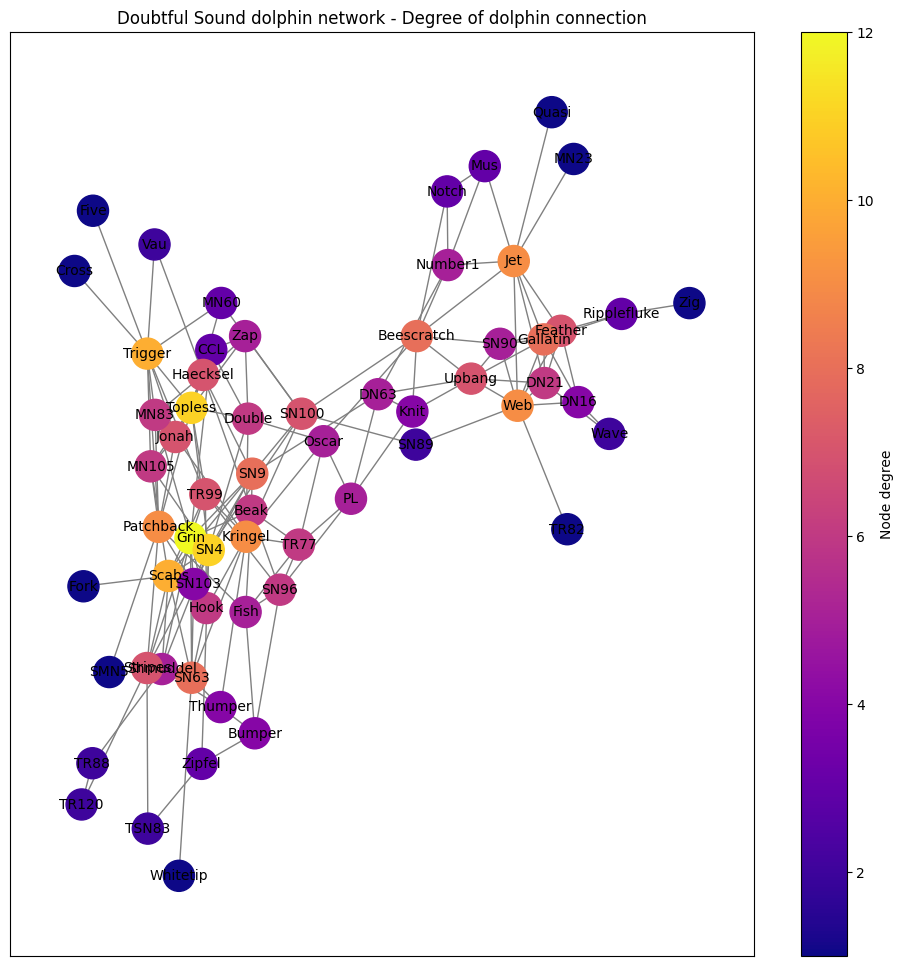

In [251]:
# Diamo un colore ai nodi basati sul grado
colors = [degree_dict[node] for node in G.nodes()]

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_size=500, node_color=colors, cmap=plt.cm.plasma) # nodi con colori basati sul loro grado
edges = nx.draw_networkx_edges(G, pos, edge_color="gray")
labels = nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

# Barra colori
plt.colorbar(nodes, label='Node degree')
plt.title("Doubtful Sound dolphin network - Degree of dolphin connection")
plt.show()

## Centrality Measures

In [252]:
# Centralità di grado per calcolare l'importanza di ciascun nodo
degree_centrality = nx.degree_centrality(G)

# Ordina i nodi per centralità di grado (dal più alto al più basso)
sorted_degree_centrality = {k: v for k, v in sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)}

print("Degree centrality (dalla più grande alla più piccola):")
for node, centrality in sorted_degree_centrality.items():
    print(f"Nodo {node}: {centrality:.4f}")

Degree centrality (dalla più grande alla più piccola):
Nodo Grin: 0.1967
Nodo SN4: 0.1803
Nodo Topless: 0.1803
Nodo Scabs: 0.1639
Nodo Trigger: 0.1639
Nodo Jet: 0.1475
Nodo Kringel: 0.1475
Nodo Patchback: 0.1475
Nodo Web: 0.1475
Nodo Beescratch: 0.1311
Nodo Gallatin: 0.1311
Nodo SN63: 0.1311
Nodo SN9: 0.1311
Nodo Feather: 0.1148
Nodo Haecksel: 0.1148
Nodo Jonah: 0.1148
Nodo SN100: 0.1148
Nodo Stripes: 0.1148
Nodo TR99: 0.1148
Nodo Upbang: 0.1148
Nodo Beak: 0.0984
Nodo DN21: 0.0984
Nodo Double: 0.0984
Nodo Hook: 0.0984
Nodo MN105: 0.0984
Nodo MN83: 0.0984
Nodo SN96: 0.0984
Nodo TR77: 0.0984
Nodo DN63: 0.0820
Nodo Fish: 0.0820
Nodo Number1: 0.0820
Nodo Oscar: 0.0820
Nodo PL: 0.0820
Nodo Shmuddel: 0.0820
Nodo SN90: 0.0820
Nodo Zap: 0.0820
Nodo Bumper: 0.0656
Nodo DN16: 0.0656
Nodo Knit: 0.0656
Nodo Thumper: 0.0656
Nodo TSN103: 0.0656
Nodo CCL: 0.0492
Nodo MN60: 0.0492
Nodo Mus: 0.0492
Nodo Notch: 0.0492
Nodo Ripplefluke: 0.0492
Nodo Zipfel: 0.0492
Nodo SN89: 0.0328
Nodo TR120: 0.0328
Nodo

In [253]:
# Centralità di betweenness per calcolare l'importanza di ciascun nodo
betweenness_centrality = nx.betweenness_centrality(G)

# Ordina i nodi per centralità di betweenness (dal più alto al più basso)
sorted_betweenness_centrality = {k: v for k, v in sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)}

print("Betweenness centrality (dalla più grande alla più piccola):")
for node, centrality in sorted_betweenness_centrality.items():
    print(f"Nodo {node}: {centrality:.4f}")

Betweenness centrality (dalla più grande alla più piccola):
Nodo SN100: 0.2482
Nodo Beescratch: 0.2133
Nodo SN9: 0.1431
Nodo SN4: 0.1386
Nodo DN63: 0.1182
Nodo Jet: 0.1143
Nodo Kringel: 0.1026
Nodo Upbang: 0.0991
Nodo Trigger: 0.0847
Nodo Web: 0.0842
Nodo SN89: 0.0705
Nodo Oscar: 0.0668
Nodo Patchback: 0.0655
Nodo Stripes: 0.0628
Nodo Grin: 0.0620
Nodo Scabs: 0.0572
Nodo Gallatin: 0.0528
Nodo SN63: 0.0454
Nodo MN60: 0.0422
Nodo Topless: 0.0407
Nodo TR99: 0.0334
Nodo Haecksel: 0.0333
Nodo PL: 0.0331
Nodo Ripplefluke: 0.0328
Nodo Shmuddel: 0.0327
Nodo DN21: 0.0294
Nodo Number1: 0.0292
Nodo SN96: 0.0292
Nodo SN90: 0.0233
Nodo TR77: 0.0232
Nodo Double: 0.0224
Nodo Feather: 0.0209
Nodo Zap: 0.0203
Nodo TSN103: 0.0192
Nodo Beak: 0.0191
Nodo Fish: 0.0161
Nodo Jonah: 0.0149
Nodo Zipfel: 0.0142
Nodo Knit: 0.0133
Nodo MN105: 0.0127
Nodo Thumper: 0.0120
Nodo Bumper: 0.0091
Nodo MN83: 0.0074
Nodo DN16: 0.0044
Nodo Notch: 0.0044
Nodo Hook: 0.0033
Nodo TR120: 0.0030
Nodo CCL: 0.0024
Nodo Mus: 0.0016

In [254]:
# Centralità di closeness
closeness_centrality = nx.closeness_centrality(G)

# Ordina la centralità di closeness (dalla più grande alla più piccola)
sorted_closeness = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)

print("Closeness centrality (dalla più grande alla più piccola):")
for node, closeness in sorted_closeness:
    print(f"{node}: {closeness:.4f}")

Closeness centrality (dalla più grande alla più piccola):
SN100: 0.4178
SN9: 0.4040
SN4: 0.3987
Kringel: 0.3910
Grin: 0.3765
Beescratch: 0.3720
DN63: 0.3653
Oscar: 0.3653
Scabs: 0.3653
Double: 0.3631
TR99: 0.3506
Beak: 0.3466
Topless: 0.3466
TSN103: 0.3427
Zap: 0.3427
Haecksel: 0.3389
TR77: 0.3389
Jonah: 0.3370
Stripes: 0.3370
SN89: 0.3352
MN105: 0.3333
MN60: 0.3333
Hook: 0.3297
SN63: 0.3297
SN96: 0.3297
Trigger: 0.3297
Upbang: 0.3245
Patchback: 0.3228
PL: 0.3228
Knit: 0.3161
Number1: 0.3161
Shmuddel: 0.3161
Fish: 0.3128
MN83: 0.3128
Thumper: 0.3112
Jet: 0.3096
CCL: 0.3081
Web: 0.3020
Zipfel: 0.3020
SN90: 0.2976
Bumper: 0.2824
Notch: 0.2773
Gallatin: 0.2711
Vau: 0.2711
Fork: 0.2687
DN21: 0.2675
TSN83: 0.2596
TR120: 0.2563
Mus: 0.2552
Feather: 0.2521
Cross: 0.2490
Five: 0.2490
Whitetip: 0.2490
TR88: 0.2470
SMN5: 0.2450
DN16: 0.2383
MN23: 0.2374
Quasi: 0.2374
TR82: 0.2328
Ripplefluke: 0.2163
Wave: 0.2133
Zig: 0.1784


In [255]:
# Centralità di eigenvector
eigenvector_centrality = nx.eigenvector_centrality(G)

# Ordina la centralità di eigenvector (dalla più grande alla più piccola)
sorted_eigenvector = sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)

print("Eigenvector centrality (dalla più grande alla più piccola):")
for node, eigenvector in sorted_eigenvector:
    print(f"{node}: {eigenvector:.4f}")

Eigenvector centrality (dalla più grande alla più piccola):
Grin: 0.3158
SN4: 0.3006
Topless: 0.2850
Scabs: 0.2811
TR99: 0.2177
Patchback: 0.2118
Trigger: 0.2107
Hook: 0.2080
SN9: 0.2079
MN105: 0.2073
Jonah: 0.2025
SN63: 0.1966
MN83: 0.1932
Stripes: 0.1903
Kringel: 0.1845
Haecksel: 0.1642
Double: 0.1431
Shmuddel: 0.1388
SN100: 0.1328
TSN103: 0.1296
Beak: 0.1285
Zap: 0.1118
MN60: 0.0874
SN96: 0.0810
TR77: 0.0804
CCL: 0.0793
Thumper: 0.0778
Fish: 0.0753
Oscar: 0.0682
Vau: 0.0521
Zipfel: 0.0520
DN63: 0.0429
Beescratch: 0.0421
PL: 0.0408
Bumper: 0.0398
Fork: 0.0391
TSN83: 0.0337
TR120: 0.0297
SMN5: 0.0294
Cross: 0.0293
Five: 0.0293
Whitetip: 0.0273
TR88: 0.0234
Upbang: 0.0230
SN89: 0.0209
Knit: 0.0207
Jet: 0.0175
Web: 0.0174
Number1: 0.0163
SN90: 0.0153
Gallatin: 0.0150
Feather: 0.0122
DN21: 0.0122
Notch: 0.0089
DN16: 0.0066
Mus: 0.0060
Ripplefluke: 0.0039
Wave: 0.0026
MN23: 0.0024
Quasi: 0.0024
TR82: 0.0024
Zig: 0.0005


In [256]:
# Load Centrality
load_centrality = nx.load_centrality(G)

# Ordina la Load Centrality (dalla più grande alla più piccola)
sorted_load_centrality = sorted(load_centrality.items(), key=lambda item: item[1], reverse=True)

print("Load centrality (dalla più grande alla più piccola):")
for node, load in sorted_load_centrality:
    print(f"{node}: {load:.4f}")

Load centrality (dalla più grande alla più piccola):
SN100: 0.2401
Beescratch: 0.1992
SN9: 0.1496
SN4: 0.1343
DN63: 0.1280
Jet: 0.1108
Upbang: 0.1005
Kringel: 0.0998
Web: 0.0892
Trigger: 0.0856
SN89: 0.0757
Patchback: 0.0672
Oscar: 0.0662
Grin: 0.0629
Stripes: 0.0624
Scabs: 0.0584
Gallatin: 0.0533
SN63: 0.0451
MN60: 0.0419
Topless: 0.0373
Haecksel: 0.0337
Ripplefluke: 0.0328
TR99: 0.0321
Number1: 0.0321
PL: 0.0319
Shmuddel: 0.0319
SN96: 0.0295
DN21: 0.0279
TR77: 0.0234
Double: 0.0229
TSN103: 0.0219
Feather: 0.0211
SN90: 0.0204
Beak: 0.0195
Zap: 0.0191
Fish: 0.0171
Jonah: 0.0157
Zipfel: 0.0154
Knit: 0.0125
Thumper: 0.0123
MN105: 0.0122
Bumper: 0.0101
MN83: 0.0073
DN16: 0.0060
Notch: 0.0044
TR120: 0.0038
Hook: 0.0031
CCL: 0.0029
Mus: 0.0017
TSN83: 0.0012
TR88: 0.0010
Vau: 0.0009
Wave: 0.0001
Cross: 0.0000
Five: 0.0000
Fork: 0.0000
MN23: 0.0000
Quasi: 0.0000
SMN5: 0.0000
TR82: 0.0000
Whitetip: 0.0000
Zig: 0.0000


In [257]:
# Top 5 nodi per centralità di grado
top_degree = sorted(degree_dict.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di grado:", top_degree)

# Top 5 nodi per centralità di betweenness
top_betweenness = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di betweenness:", top_betweenness)

# Top 5 nodi per centralità di closeness
top_closeness = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di closeness:", top_closeness)

# Top 5 nodi per centralità di eigenvector
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di eigenvector:", top_eigenvector)

# Top 5 nodi per centralità di eigenvector
top_load = sorted(load_centrality.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di load:", top_load)

Top 5 nodi per centralità di grado: [('Grin', 12), ('SN4', 11), ('Topless', 11), ('Scabs', 10), ('Trigger', 10)]
Top 5 nodi per centralità di betweenness: [('SN100', 0.24823719602893804), ('Beescratch', 0.21332443553281097), ('SN9', 0.1431495183426175), ('SN4', 0.13856978865859435), ('DN63', 0.11823861926938342)]
Top 5 nodi per centralità di closeness: [('SN100', 0.4178082191780822), ('SN9', 0.40397350993377484), ('SN4', 0.39869281045751637), ('Kringel', 0.391025641025641), ('Grin', 0.3765432098765432)]
Top 5 nodi per centralità di eigenvector: [('Grin', 0.3157810764804676), ('SN4', 0.3005609284704956), ('Topless', 0.28500310473240437), ('Scabs', 0.281097017160587), ('TR99', 0.21769051331081507)]
Top 5 nodi per centralità di load: [('SN100', 0.24014528580102343), ('Beescratch', 0.19919624786769607), ('SN9', 0.14959271908520544), ('SN4', 0.134280987076069), ('DN63', 0.12800260936189894)]


# Altre analisi 

### Coefficiente di clustering

In [258]:
# Calcola il coefficiente di clustering (per individuare le comunità di delfini)
clustering_coefficient = nx.average_clustering(G)
print(f"Coefficiente di clustering: {clustering_coefficient:.4f}")

Coefficiente di clustering: 0.2590


### Identificazione delle comunità usando Louvain

Valori delle partizioni:
{'Beak': 0, 'Beescratch': 4, 'Bumper': 0, 'CCL': 2, 'Cross': 3, 'DN16': 4, 'DN21': 4, 'DN63': 0, 'Double': 2, 'Feather': 4, 'Fish': 0, 'Five': 3, 'Fork': 1, 'Gallatin': 4, 'Grin': 1, 'Haecksel': 3, 'Hook': 1, 'Jet': 4, 'Jonah': 3, 'Knit': 0, 'Kringel': 1, 'MN105': 3, 'MN23': 4, 'MN60': 3, 'MN83': 3, 'Mus': 4, 'Notch': 4, 'Number1': 4, 'Oscar': 2, 'Patchback': 3, 'PL': 0, 'Quasi': 4, 'Ripplefluke': 4, 'Scabs': 1, 'Shmuddel': 1, 'SMN5': 3, 'SN100': 2, 'SN4': 1, 'SN63': 1, 'SN89': 2, 'SN9': 1, 'SN90': 4, 'SN96': 0, 'Stripes': 1, 'Thumper': 1, 'Topless': 3, 'TR120': 1, 'TR77': 0, 'TR82': 4, 'TR88': 1, 'TR99': 1, 'Trigger': 3, 'TSN103': 1, 'TSN83': 1, 'Upbang': 4, 'Vau': 3, 'Wave': 4, 'Web': 4, 'Whitetip': 1, 'Zap': 2, 'Zig': 4, 'Zipfel': 1}
Numero di comunità trovate: 5


/var/folders/ht/ykt5nd_d1w55_nvpcjzwqvmw0000gn/T/ipykernel_1101/3814962214.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.get_cmap('viridis', num_communities), node_size=500)


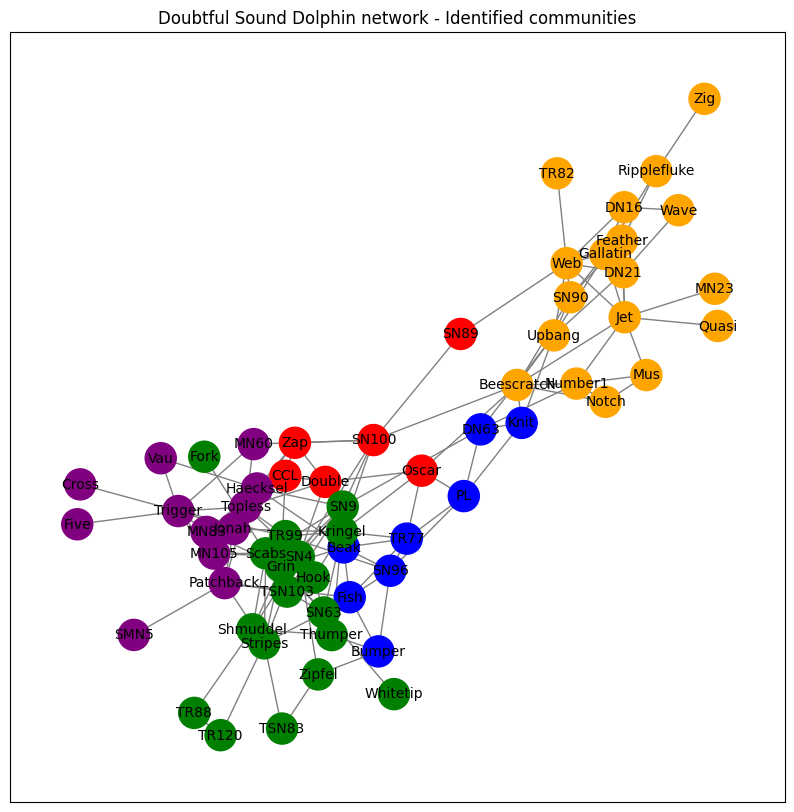

In [259]:
# Trova le comunità usando l'algoritmo Louvain
partition = community_louvain.best_partition(G)

# Stampa i valori delle partizioni (ad ogni delfino viene assegnato un valore)
print("Valori delle partizioni:")
print(partition)
print("Numero di comunità trovate:", len(set(partition.values())))

# Aggiunge l'informazione delle comunità ai nodi
nx.set_node_attributes(G, partition, 'community')

# Lista dei colori delle comunità
community_colors = ['blue', 'green', 'red', 'purple', 'orange']

# Trova il n° di comunità
num_communities = len(set(partition.values()))

# Disegna la rete con colori diversi per ciascuna comunità
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, seed=42)  # Imposta il seed per la riproducibilità della disposizione

# Crea una lista di colori per i nodi in base alle comunità
node_colors = [community_colors[partition[node]] for node in G.nodes()]

nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.get_cmap('viridis', num_communities), node_size=500)
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
plt.title("Doubtful Sound Dolphin network - Identified communities")
plt.show()

### Modularità

In [260]:
# Calcola la modularity
modularity = community_louvain.modularity(partition, G)
print(f"Modularity of the network: {modularity:.4f}")

Modularity of the network: 0.5188


Ponti trovati:
('Cross', 'Trigger')
('Five', 'Trigger')
('Fork', 'Scabs')
('Jet', 'MN23')
('Jet', 'Quasi')
('Patchback', 'SMN5')
('Ripplefluke', 'Zig')
('SN63', 'Whitetip')
('TR82', 'Web')


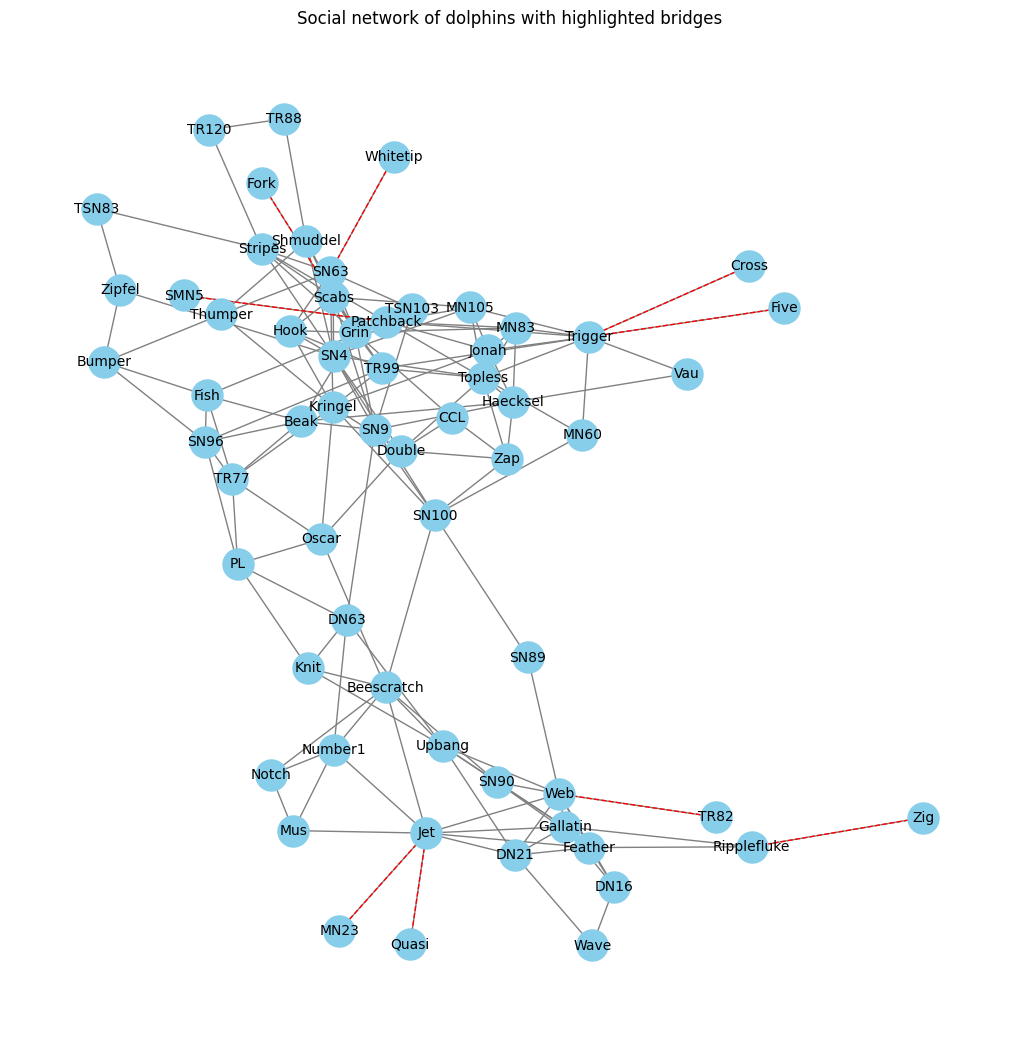

In [261]:
# Trova tutti gli archi nel grafo
bridges = list(nx.bridges(G))

print("Ponti trovati:")
for bridge in bridges:
    print(bridge)

# Visualizza la rete con archi evidenziati
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)

# Coloriamo gli archi con il colore rosso
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", edge_color="gray", font_size=10, font_color="black")
nx.draw_networkx_edges(G, pos, edgelist=bridges, edge_color='r', style='dashed')
plt.title("Social network of dolphins with highlighted bridges")
plt.show()

## Gruppi di nodi

### Clique

In [262]:
# Trova tutte le clique massimali nella rete
cliques = list(nx.find_cliques(G)) 

# Ordina le clique per dimensione (n° di nodi)
sorted_cliques = sorted(cliques, key=len, reverse=True)

print("Top 5 clique per dimensione:")
for i, clique in enumerate(sorted_cliques[:5]):
    print(f"Clique {i+1}: {clique}")

Top 5 clique per dimensione:
Clique 1: ['Gallatin', 'Web', 'Feather', 'DN21', 'Jet']
Clique 2: ['MN105', 'Topless', 'Patchback', 'Trigger', 'Jonah']
Clique 3: ['Trigger', 'Topless', 'MN83', 'Patchback', 'Jonah']
Clique 4: ['Gallatin', 'Web', 'Upbang', 'DN21']
Clique 5: ['Gallatin', 'Web', 'Upbang', 'SN90']


### Visualizzazione grafica di tutte le clique separatamente e nell'intera rete

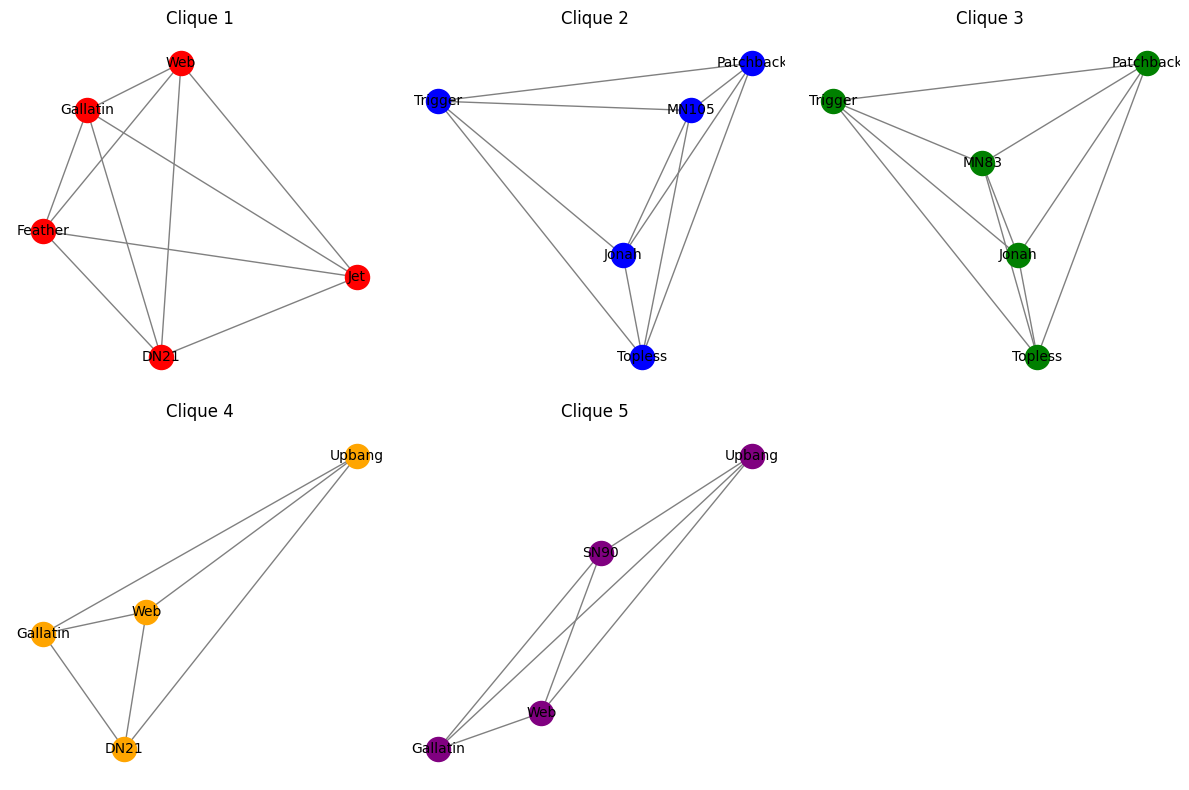

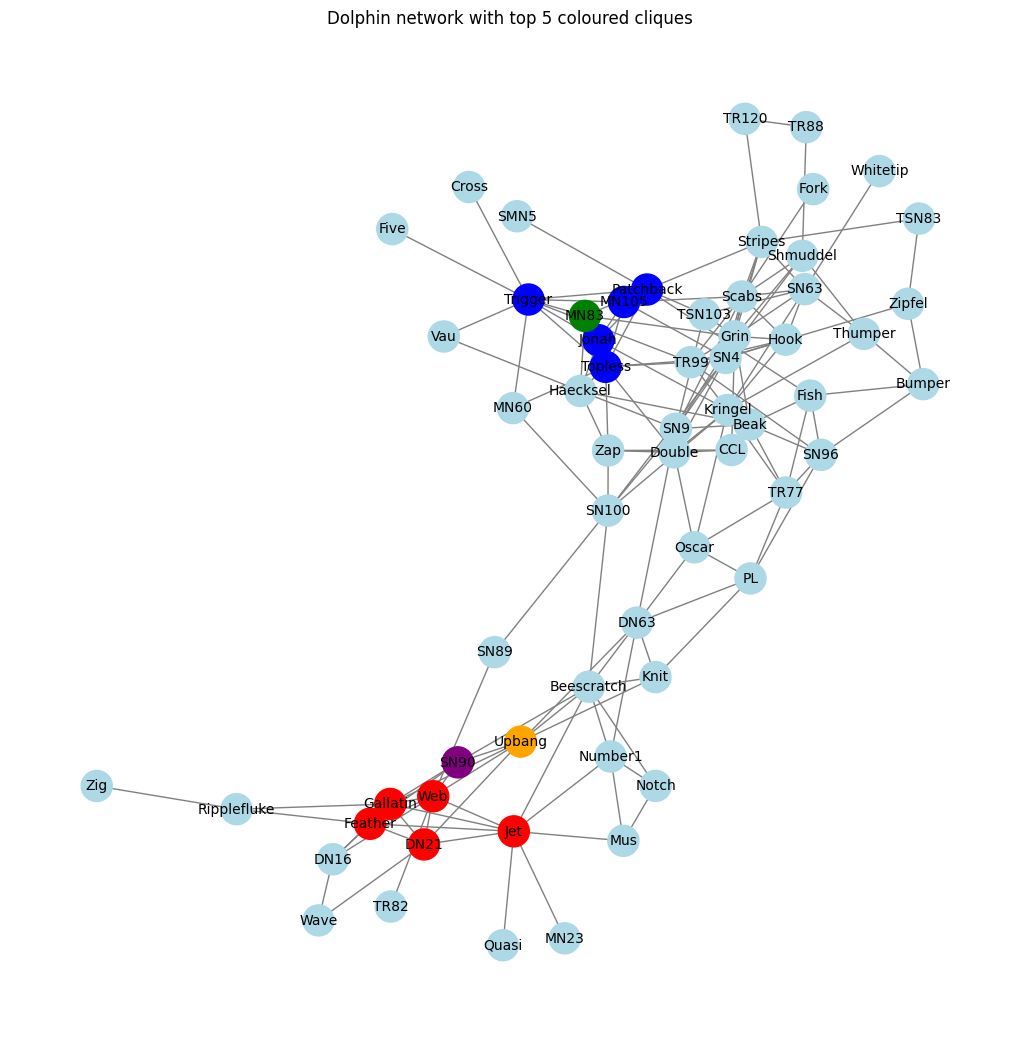

In [263]:
# Prende le prime 5 clique per dimensione
top_5_cliques = sorted_cliques[:5]

# Calcola la disposizione dei nodi per l'intera rete
pos = nx.spring_layout(G)

colors = ['red', 'blue', 'green', 'orange', 'purple']

# Disegna le clique separatamente colorandole
plt.figure(figsize=(12, 8))
for i, clique_nodes in enumerate(top_5_cliques):
    subgraph = G.subgraph(clique_nodes)
    plt.subplot(2, 3, i + 1)
    nx.draw(subgraph, pos, with_labels=True, node_color=colors[i], edge_color="gray", font_size=10, font_color="black")
    plt.title(f"Clique {i + 1}")

plt.tight_layout()
plt.show()

# Disegna l'intera rete con le clique colorate
plt.figure(figsize=(10, 10))
node_colors = []
for node in G.nodes():
    for i, clique_nodes in enumerate(top_5_cliques):
        if node in clique_nodes:
            node_colors.append(colors[i])
            break
    else:
        node_colors.append('lightblue')  # Colore dei nodi non fanno parte delle top clique

nx.draw(G, pos, with_labels=True, node_size=500, node_color=node_colors, edge_color="gray", font_size=10, font_color="black")
plt.title("Dolphin network with top 5 coloured cliques")
plt.show()

### Core numbers e K-core

In [264]:
# Calcola il core numbers per ogni nodo
core_numbers = nx.core_number(G)

print("Core numbers:")
for node, core_number in core_numbers.items():
    print(f"Nodo {node}: core number {core_number}")

Core numbers:
Nodo Beak: core number 4
Nodo Beescratch: core number 4
Nodo Bumper: core number 3
Nodo CCL: core number 3
Nodo Cross: core number 1
Nodo DN16: core number 3
Nodo DN21: core number 4
Nodo DN63: core number 4
Nodo Double: core number 4
Nodo Feather: core number 4
Nodo Fish: core number 4
Nodo Five: core number 1
Nodo Fork: core number 1
Nodo Gallatin: core number 4
Nodo Grin: core number 4
Nodo Haecksel: core number 4
Nodo Hook: core number 4
Nodo Jet: core number 4
Nodo Jonah: core number 4
Nodo Knit: core number 4
Nodo Kringel: core number 4
Nodo MN105: core number 4
Nodo MN23: core number 1
Nodo MN60: core number 3
Nodo MN83: core number 4
Nodo Mus: core number 3
Nodo Notch: core number 3
Nodo Number1: core number 3
Nodo Oscar: core number 4
Nodo Patchback: core number 4
Nodo PL: core number 4
Nodo Quasi: core number 1
Nodo Ripplefluke: core number 2
Nodo Scabs: core number 4
Nodo Shmuddel: core number 3
Nodo SMN5: core number 1
Nodo SN100: core number 4
Nodo SN4: core 

Nodi nel K-core (K=4): ['Beak', 'Beescratch', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN83', 'Oscar', 'Patchback', 'PL', 'Scabs', 'SN100', 'SN4', 'SN63', 'SN9', 'SN90', 'SN96', 'Stripes', 'Topless', 'TR77', 'TR99', 'Trigger', 'TSN103', 'Upbang', 'Web', 'Zap']


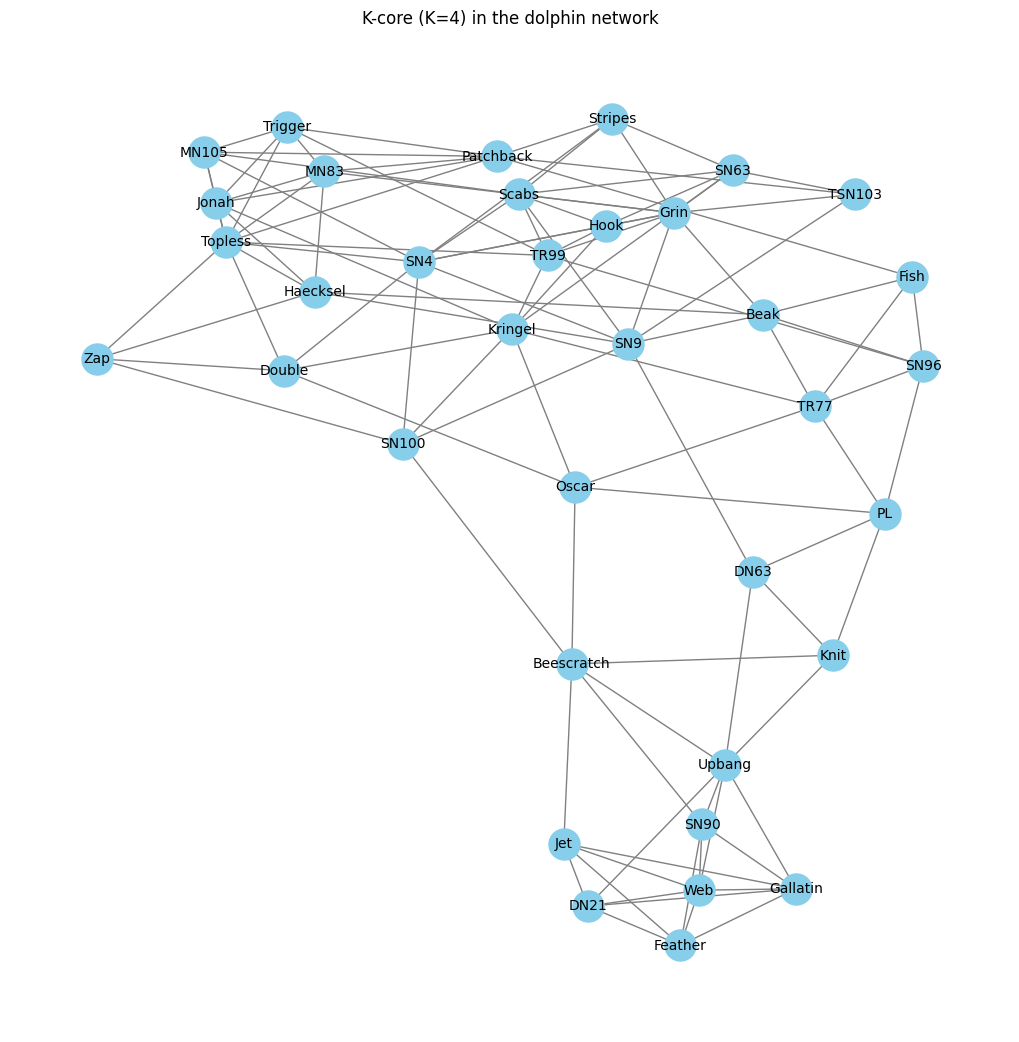

In [265]:
# Calcolare i cores della rete con k=4
k = 4
k_core = nx.k_core(G, k=k)

core_nodes = k_core.nodes()
print(f"Nodi nel K-core (K={k}):", core_nodes)

plt.figure(figsize=(10,10))
pos = nx.spring_layout(k_core)
nx.draw(k_core, pos, with_labels=True, node_size=500, node_color="skyblue", edge_color="gray", font_size=10, font_color="black")
plt.title(f"K-core (K={k}) in the dolphin network")
plt.show()

### Omofilia

In [266]:
degree_assortativity = nx.degree_assortativity_coefficient(G)
print(f"Coefficiente di assortatività per grado: {degree_assortativity:.4f}")

Coefficiente di assortatività per grado: -0.0436


### Triadi

In [267]:
# Calcola le triadi (in una rete non diretta)
def count_triads(graph):
    triad_counts = defaultdict(int)

    for node in graph.nodes():
        neighbors = set(graph.neighbors(node))
        for neighbor in neighbors:
            # Trova l'intersezione dei vicini per trovare le triadi
            common_neighbors = neighbors & set(graph.neighbors(neighbor))

            # Conta le triadi in base alla lunghezza dell'intersezione
            for common_neighbor in common_neighbors:
                if graph.has_edge(node, common_neighbor):
                    triad_type = tuple(sorted([node, neighbor, common_neighbor]))
                    triad_counts[triad_type] += 1

    return triad_counts

triad_counts = count_triads(G)

total_triads = sum(triad_counts.values())
print(f"Numero totale di triadi: {total_triads}")

print("Distribuzione delle triadi nella rete:")
for triad_type, count in triad_counts.items():
    print(f"Triade {triad_type}: {count}")

Numero totale di triadi: 570
Distribuzione delle triadi nella rete:
Triade ('Beak', 'Grin', 'SN9'): 6
Triade ('Beak', 'Haecksel', 'SN9'): 6
Triade ('Beak', 'Fish', 'SN96'): 6
Triade ('Beak', 'SN96', 'TR77'): 6
Triade ('Beak', 'Fish', 'TR77'): 6
Triade ('Beescratch', 'Notch', 'Number1'): 6
Triade ('Beescratch', 'SN90', 'Upbang'): 6
Triade ('Beescratch', 'Jet', 'Number1'): 6
Triade ('Beescratch', 'Knit', 'Upbang'): 6
Triade ('Bumper', 'Fish', 'SN96'): 6
Triade ('CCL', 'Double', 'Zap'): 6
Triade ('DN16', 'Feather', 'Web'): 6
Triade ('DN16', 'Gallatin', 'Web'): 6
Triade ('DN16', 'Feather', 'Gallatin'): 6
Triade ('DN21', 'Upbang', 'Web'): 6
Triade ('DN21', 'Gallatin', 'Upbang'): 6
Triade ('DN21', 'Feather', 'Jet'): 6
Triade ('DN21', 'Feather', 'Web'): 6
Triade ('DN21', 'Feather', 'Gallatin'): 6
Triade ('DN21', 'Gallatin', 'Jet'): 6
Triade ('DN21', 'Gallatin', 'Web'): 6
Triade ('DN21', 'Jet', 'Web'): 6
Triade ('DN63', 'Knit', 'PL'): 6
Triade ('DN63', 'Knit', 'Upbang'): 6
Triade ('Double', 'K

## Importazione nuovo dataset con la nuova feature del sesso di alcuni delfini (una sottorete della rete iniziale)

In [268]:
sex_data = pd.read_csv('dolphins/dolphins_sex.txt', sep=', ', engine='python', header=None, names=['node', 'sex'])
# Dizionario per mappare il nodo al sesso
sex_dict = dict(zip(sex_data['node'], sex_data['sex']))

In [269]:
# Crea la sottorete con i nodi dal file del sesso
nodes_of_interest = sex_data['node'].tolist()
subgraph = G.subgraph(nodes_of_interest).copy()

In [270]:
nodes_M = []
nodes_F = []
count_M = 0
count_F = 0

for node in subgraph.nodes():
    if sex_dict[node] == 'M':
        nodes_M.append(node)
        count_M += 1
    elif sex_dict[node] == 'F':
        nodes_F.append(node)
        count_F += 1
        
print("Delfini maschi (M):", nodes_M)
print("Numero di delfini maschili (M):", count_M)

print("Delfini femmine (F):", nodes_F)
print("Numero di delfini femminili (F):", count_F)

Delfini maschi (M): ['Beak', 'DN21', 'DN63', 'Feather', 'Gallatin', 'Haecksel', 'Jet', 'Jonah', 'Knit', 'MN105', 'MN83', 'Notch', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'SN90', 'SN96', 'Topless', 'Upbang', 'Web']
Numero di delfini maschili (M): 22
Delfini femmine (F): ['DN16', 'Double', 'Fish', 'Five', 'Grin', 'Hook', 'Kringel', 'Scabs', 'Shmuddel', 'SN4', 'SN63', 'SN89', 'Stripes', 'TR88', 'Trigger', 'Wave', 'Whitetip']
Numero di delfini femminili (F): 17


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


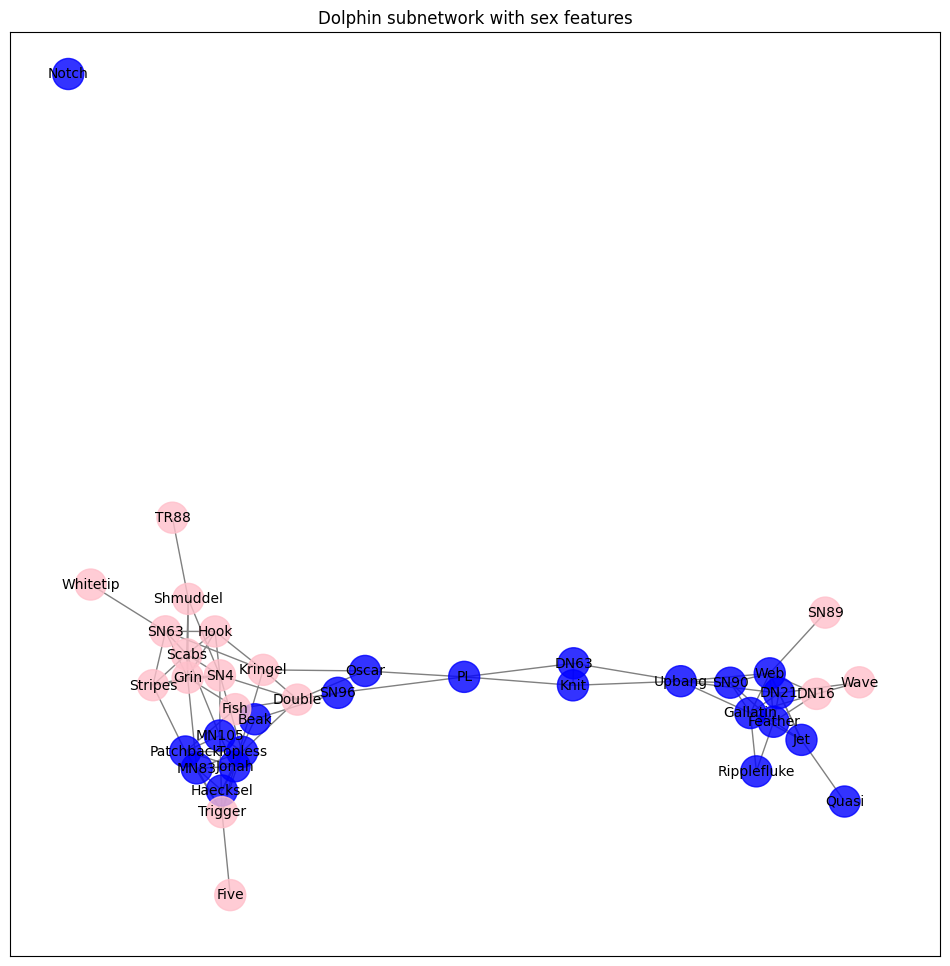

In [271]:
sex_color_map = {'M': 'blue', 'F': 'pink'}

# Lista dei colori dei nodi in base al sesso
node_colors = [sex_color_map[sex_dict[node]] for node in subgraph.nodes()]

# Grafo della sottorete con i colori dei nodi
plt.figure(figsize=(12,12))
pos = nx.spring_layout(subgraph)
nodes = nx.draw_networkx_nodes(subgraph, pos, node_size=500, node_color=node_colors, cmap=plt.cm.coolwarm, alpha=0.8)
edges = nx.draw_networkx_edges(subgraph, pos, edge_color='gray')
labels = nx.draw_networkx_labels(subgraph, pos, font_size=10, font_color="black")

plt.title("Dolphin subnetwork with sex features")
plt.show()

In [272]:
# Calcola il grado di ciascun nodo (n° di connessioni per ogni delfino)
degree_dict_sub = dict(subgraph.degree())
#print(degree_dict)

# Lista di tuple (nodo, grado) e le ordina in base al grado decrescente
sorted_degrees_sub = sorted(degree_dict_sub.items(), key=lambda x: x[1], reverse=True)

# Nodi ordinati per grado
print("Nodi ordinati per grado (dal più alto al più basso):")
for node, degree in sorted_degrees_sub:
    print(f"Nodo: {node}, Grado: {degree}")

Nodi ordinati per grado (dal più alto al più basso):
Nodo: Gallatin, Grado: 8
Nodo: Grin, Grado: 8
Nodo: SN4, Grado: 8
Nodo: Topless, Grado: 8
Nodo: Web, Grado: 8
Nodo: Feather, Grado: 7
Nodo: Jonah, Grado: 7
Nodo: Patchback, Grado: 7
Nodo: Scabs, Grado: 7
Nodo: DN21, Grado: 6
Nodo: MN105, Grado: 6
Nodo: MN83, Grado: 6
Nodo: SN63, Grado: 6
Nodo: Trigger, Grado: 6
Nodo: Upbang, Grado: 6
Nodo: Hook, Grado: 5
Nodo: Jet, Grado: 5
Nodo: Kringel, Grado: 5
Nodo: Stripes, Grado: 5
Nodo: Beak, Grado: 4
Nodo: DN16, Grado: 4
Nodo: Double, Grado: 4
Nodo: Haecksel, Grado: 4
Nodo: PL, Grado: 4
Nodo: Shmuddel, Grado: 4
Nodo: SN90, Grado: 4
Nodo: DN63, Grado: 3
Nodo: Fish, Grado: 3
Nodo: Knit, Grado: 3
Nodo: Oscar, Grado: 3
Nodo: SN96, Grado: 3
Nodo: Ripplefluke, Grado: 2
Nodo: Wave, Grado: 2
Nodo: Five, Grado: 1
Nodo: Quasi, Grado: 1
Nodo: SN89, Grado: 1
Nodo: TR88, Grado: 1
Nodo: Whitetip, Grado: 1
Nodo: Notch, Grado: 0


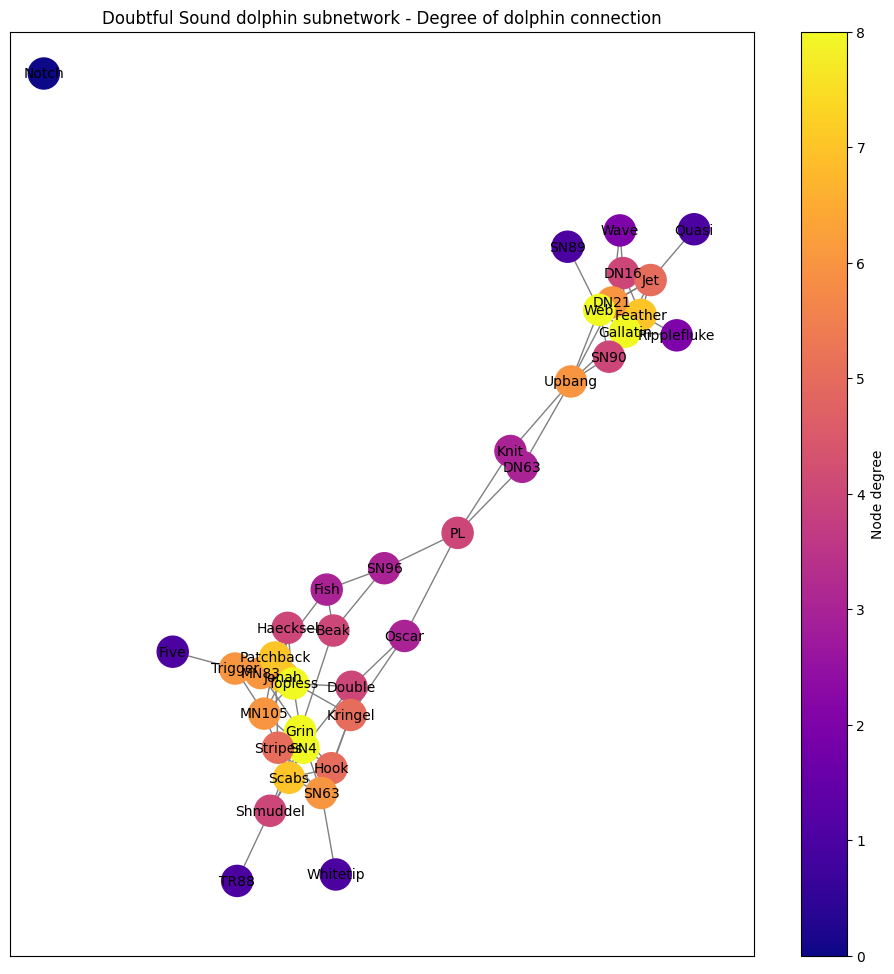

In [273]:
# Colori dei nodi basati sul grado
colors = [degree_dict_sub[node] for node in subgraph.nodes()]

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(subgraph)
nodes = nx.draw_networkx_nodes(subgraph, pos, node_size=500, node_color=colors, cmap=plt.cm.plasma) # Nodi con colori in base al loro grado
edges = nx.draw_networkx_edges(subgraph, pos, edge_color="gray")
labels = nx.draw_networkx_labels(subgraph, pos, font_size=10, font_color="black")

# Barra colori
plt.colorbar(nodes, label='Node degree')
plt.title("Doubtful Sound dolphin subnetwork - Degree of dolphin connection")
plt.show()

## Centrality Measures

In [274]:
# Centralità di grado per calcolare l'importanza di ciascun nodo
degree_centrality_sub = nx.degree_centrality(subgraph)

# Ordiniamo i nodi per centralità di grado (dal più alto al più basso)
sorted_degree_centrality_sub = {k: v for k, v in sorted(degree_centrality_sub.items(), key=lambda item: item[1], reverse=True)}

print("Degree centrality (dalla più grande alla più piccola):")
for node, centrality in sorted_degree_centrality_sub.items():
    print(f"Nodo {node}: {centrality:.4f}")

Degree centrality (dalla più grande alla più piccola):
Nodo Gallatin: 0.2105
Nodo Grin: 0.2105
Nodo SN4: 0.2105
Nodo Topless: 0.2105
Nodo Web: 0.2105
Nodo Feather: 0.1842
Nodo Jonah: 0.1842
Nodo Patchback: 0.1842
Nodo Scabs: 0.1842
Nodo DN21: 0.1579
Nodo MN105: 0.1579
Nodo MN83: 0.1579
Nodo SN63: 0.1579
Nodo Trigger: 0.1579
Nodo Upbang: 0.1579
Nodo Hook: 0.1316
Nodo Jet: 0.1316
Nodo Kringel: 0.1316
Nodo Stripes: 0.1316
Nodo Beak: 0.1053
Nodo DN16: 0.1053
Nodo Double: 0.1053
Nodo Haecksel: 0.1053
Nodo PL: 0.1053
Nodo Shmuddel: 0.1053
Nodo SN90: 0.1053
Nodo DN63: 0.0789
Nodo Fish: 0.0789
Nodo Knit: 0.0789
Nodo Oscar: 0.0789
Nodo SN96: 0.0789
Nodo Ripplefluke: 0.0526
Nodo Wave: 0.0526
Nodo Five: 0.0263
Nodo Quasi: 0.0263
Nodo SN89: 0.0263
Nodo TR88: 0.0263
Nodo Whitetip: 0.0263
Nodo Notch: 0.0000


In [275]:
# Centralità di betweenness per calcolare l'importanza di ciascun nodo
betweenness_centrality_sub = nx.betweenness_centrality(subgraph)

# Ordina i nodi per centralità di betweenness (dal più alto al più basso)
sorted_betweenness_centrality_sub = {k: v for k, v in sorted(betweenness_centrality_sub.items(), key=lambda item: item[1], reverse=True)}

print("Betweenness centrality (dalla più grande alla più piccola):")
for node, centrality in sorted_betweenness_centrality_sub.items():
    print(f"Nodo {node}: {centrality:.4f}")

Betweenness centrality (dalla più grande alla più piccola):
Nodo PL: 0.4651
Nodo Upbang: 0.4074
Nodo Oscar: 0.2745
Nodo DN63: 0.2048
Nodo Knit: 0.2048
Nodo SN96: 0.1792
Nodo Kringel: 0.1501
Nodo Double: 0.1179
Nodo Beak: 0.1119
Nodo Web: 0.1091
Nodo Gallatin: 0.1020
Nodo Grin: 0.0970
Nodo DN21: 0.0808
Nodo SN4: 0.0750
Nodo SN63: 0.0683
Nodo Patchback: 0.0621
Nodo Fish: 0.0611
Nodo Topless: 0.0526
Nodo Trigger: 0.0516
Nodo Jet: 0.0512
Nodo Shmuddel: 0.0512
Nodo Jonah: 0.0466
Nodo Scabs: 0.0191
Nodo MN105: 0.0180
Nodo MN83: 0.0170
Nodo Haecksel: 0.0132
Nodo Stripes: 0.0116
Nodo Hook: 0.0113
Nodo SN90: 0.0096
Nodo Feather: 0.0092
Nodo DN16: 0.0042
Nodo Wave: 0.0004
Nodo Five: 0.0000
Nodo Notch: 0.0000
Nodo Quasi: 0.0000
Nodo Ripplefluke: 0.0000
Nodo SN89: 0.0000
Nodo TR88: 0.0000
Nodo Whitetip: 0.0000


In [276]:
# Centralità di closeness
closeness_centrality_sub = nx.closeness_centrality(subgraph)

# Ordinare la centralità di closeness (dalla più grande alla più piccola)
sorted_closeness_sub = sorted(closeness_centrality_sub.items(), key=lambda item: item[1], reverse=True)

print("Closeness centrality (dalla più grande alla più piccola):")
for node, closeness in sorted_closeness_sub:
    print(f"{node}: {closeness:.4f}")

Closeness centrality (dalla più grande alla più piccola):
PL: 0.3079
Oscar: 0.3053
Double: 0.2977
Kringel: 0.2977
SN96: 0.2977
Beak: 0.2905
DN63: 0.2815
Grin: 0.2815
Knit: 0.2815
Fish: 0.2793
SN4: 0.2771
Topless: 0.2750
Jonah: 0.2729
Patchback: 0.2709
SN63: 0.2649
Hook: 0.2630
Haecksel: 0.2555
Upbang: 0.2555
MN83: 0.2451
Scabs: 0.2451
MN105: 0.2434
Stripes: 0.2418
Trigger: 0.2355
Shmuddel: 0.2309
Gallatin: 0.2224
Web: 0.2224
DN21: 0.2197
SN90: 0.2144
Whitetip: 0.2095
Feather: 0.1906
Five: 0.1906
Jet: 0.1886
TR88: 0.1876
DN16: 0.1867
Ripplefluke: 0.1829
SN89: 0.1820
Wave: 0.1820
Quasi: 0.1587
Notch: 0.0000


In [277]:
# Centralità di eigenvector con un massimo di 1000 iterazioni
eigenvector_centrality_sub = nx.eigenvector_centrality(subgraph, max_iter=1000)

# Centralità di PageRank come alternativa alla centralità di eigenvector
pagerank_centrality_sub = nx.pagerank(subgraph)

# Rimuoviamo nodi isolati dalla sottorete per migliorare il calcolo della centralità
subgraph.remove_nodes_from(list(nx.isolates(subgraph)))

# Ordina la centralità di eigenvector dalla più grande alla più piccola
sorted_eigenvector_sub = sorted(eigenvector_centrality_sub.items(), key=lambda item: item[1], reverse=True)

# Stampa la centralità di eigenvector ordinata
print("Eigenvector centrality (dalla più grande alla più piccola):")
for node, eigenvector in sorted_eigenvector_sub:
    print(f"{node}: {eigenvector:.4f}")

# Ordina la centralità di PageRank dalla più grande alla più piccola
sorted_pagerank_sub = sorted(pagerank_centrality_sub.items(), key=lambda item: item[1], reverse=True)

# Stampa la centralità di PageRank ordinata
print("\nPageRank centrality (dalla più grande alla più piccola):")
for node, pagerank in sorted_pagerank_sub:
    print(f"{node}: {pagerank:.4f}")


Eigenvector centrality (dalla più grande alla più piccola):
Topless: 0.3338
SN4: 0.3179
MN105: 0.2920
Jonah: 0.2892
Grin: 0.2876
Patchback: 0.2871
Scabs: 0.2781
MN83: 0.2678
Trigger: 0.2511
Stripes: 0.2269
Hook: 0.2035
SN63: 0.1951
Haecksel: 0.1631
Shmuddel: 0.1510
Kringel: 0.1460
Double: 0.1408
Beak: 0.0909
Fish: 0.0676
Oscar: 0.0500
Five: 0.0417
Whitetip: 0.0324
SN96: 0.0287
TR88: 0.0251
PL: 0.0141
DN63: 0.0032
Knit: 0.0032
Upbang: 0.0020
Gallatin: 0.0015
Web: 0.0015
DN21: 0.0013
Feather: 0.0013
SN90: 0.0010
Jet: 0.0010
DN16: 0.0008
Ripplefluke: 0.0005
Wave: 0.0003
SN89: 0.0003
Quasi: 0.0002
Notch: 0.0000

PageRank centrality (dalla più grande alla più piccola):
Web: 0.0464
Gallatin: 0.0447
Grin: 0.0405
Feather: 0.0397
SN4: 0.0396
Topless: 0.0389
Scabs: 0.0354
Upbang: 0.0350
Patchback: 0.0350
DN21: 0.0347
Jonah: 0.0345
SN63: 0.0333
Trigger: 0.0321
Jet: 0.0312
MN83: 0.0299
MN105: 0.0295
Kringel: 0.0274
PL: 0.0264
Hook: 0.0261
Stripes: 0.0257
Shmuddel: 0.0245
DN16: 0.0244
Beak: 0.0238


In [278]:
# Load Centrality
load_centrality_sub = nx.load_centrality(subgraph)

# Ordina la Load Centrality (dalla più grande alla più piccola)
sorted_load_centrality_sub = sorted(load_centrality_sub.items(), key=lambda item: item[1], reverse=True)

print("Load centrality (dalla più grande alla più piccola):")
for node, load in sorted_load_centrality_sub:
    print(f"{node}: {load:.4f}")

Load centrality (dalla più grande alla più piccola):
PL: 0.4910
Upbang: 0.4301
Oscar: 0.2815
DN63: 0.2162
Knit: 0.2162
SN96: 0.1974
Kringel: 0.1549
Double: 0.1208
Beak: 0.1192
Web: 0.1151
Gallatin: 0.1076
Grin: 0.1048
DN21: 0.0853
SN4: 0.0770
Patchback: 0.0728
Fish: 0.0721
SN63: 0.0705
Trigger: 0.0544
Jet: 0.0541
Shmuddel: 0.0541
Topless: 0.0530
Jonah: 0.0488
Scabs: 0.0198
MN83: 0.0186
MN105: 0.0177
Haecksel: 0.0127
Stripes: 0.0117
Hook: 0.0102
SN90: 0.0101
Feather: 0.0097
DN16: 0.0044
Wave: 0.0004
Five: 0.0000
Quasi: 0.0000
Ripplefluke: 0.0000
SN89: 0.0000
TR88: 0.0000
Whitetip: 0.0000


In [279]:
# Top 5 nodi per centralità di grado
top_degree_sub = sorted(degree_dict_sub.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di grado:", top_degree_sub)

# Top 5 nodi per centralità di betweenness
top_betweenness_sub = sorted(betweenness_centrality_sub.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di betweenness:", top_betweenness_sub)

# Top 5 nodi per centralità di closeness
top_closeness_sub = sorted(closeness_centrality_sub.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di closeness:", top_closeness_sub)

# Top 5 nodi per centralità di eigenvector
top_eigenvector_sub = sorted(eigenvector_centrality_sub.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di eigenvector:", top_eigenvector_sub)

# Top 5 nodi per centralità di eigenvector
top_pagerank_sub = sorted(pagerank_centrality_sub.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di pagerank:", top_pagerank_sub)

# Top 5 nodi per centralità di eigenvector
top_load_sub = sorted(load_centrality_sub.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di load:", top_load_sub)

Top 5 nodi per centralità di grado: [('Gallatin', 8), ('Grin', 8), ('SN4', 8), ('Topless', 8), ('Web', 8)]
Top 5 nodi per centralità di betweenness: [('PL', 0.46514935988620204), ('Upbang', 0.407386710018289), ('Oscar', 0.27453769559032726), ('DN63', 0.20483641536273117), ('Knit', 0.20483641536273117)]
Top 5 nodi per centralità di closeness: [('PL', 0.30791722896986057), ('Oscar', 0.3053077609277431), ('Double', 0.29773814702044366), ('Kringel', 0.29773814702044366), ('SN96', 0.29773814702044366)]
Top 5 nodi per centralità di eigenvector: [('Topless', 0.33378546870665204), ('SN4', 0.3179277114048122), ('MN105', 0.2919542614661864), ('Jonah', 0.2892245302275872), ('Grin', 0.2876159444308182)]
Top 5 nodi per centralità di pagerank: [('Web', 0.046356797766801364), ('Gallatin', 0.04474095305007181), ('Grin', 0.040471303867957734), ('Feather', 0.03971926341581763), ('SN4', 0.03959114350116439)]
Top 5 nodi per centralità di load: [('PL', 0.49099099099099097), ('Upbang', 0.4300863363363363), 

## Altre analisi del sottografo

### Omofilia

In [280]:
# Dizionario per mappare il nodo al sesso
sex_dict = dict(zip(sex_data['node'], sex_data['sex']))

# Sottorete con i nodi dal file dolphins_sex
nodes_of_interest = sex_data['node'].tolist()
subgraph = nx.Graph()

# Aggiungiamo i nodi e gli archi della sottorete dalla rete principale G
for node in nodes_of_interest:
    if node in G.nodes:
        subgraph.add_node(node, sex=sex_dict[node])
        for neighbor in G.neighbors(node):
            if neighbor in nodes_of_interest:
                subgraph.add_edge(node, neighbor)

# Coefficiente di assortatività per grado
degree_assortativity_sub = nx.degree_assortativity_coefficient(subgraph)
print(f"Coefficiente di assortatività per grado: {degree_assortativity_sub:.4f}")

unique_sexes = set(nx.get_node_attributes(subgraph, 'sex').values())

# Coefficiente di assortatività per sesso (se c'è varietà)
if len(unique_sexes) >= 2:
    sex_assortativity_sub = nx.attribute_assortativity_coefficient(subgraph, 'sex')
    print(f"Coefficiente di assortatività per sesso: {sex_assortativity_sub:.4f}")
else:
    print("Non è possibile calcolare l'assortatività per sesso.")

Coefficiente di assortatività per grado: 0.0628
Coefficiente di assortatività per sesso: 0.4570
